# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [2]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filepath = "/content/drive/MyDrive/datas/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [5]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
477,7,114,76,17,110,23.8,0.466,31,0
34,10,122,78,31,0,27.6,0.512,45,0
412,1,143,84,23,310,42.4,1.076,22,0
405,2,123,48,32,165,42.1,0.520,26,0
337,5,115,76,0,0,31.2,0.343,44,1


In [6]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [7]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [9]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [10]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [11]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [13]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 1s 16ms/step - loss: 0.7815 - accuracy: 0.3559 - val_loss: 0.7804 - val_accuracy: 0.4167
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7489 - accuracy: 0.4479 - val_loss: 0.7529 - val_accuracy: 0.4688
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.7217 - accuracy: 0.5017 - val_loss: 0.7294 - val_accuracy: 0.5365
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6985 - accuracy: 0.5417 - val_loss: 0.7091 - val_accuracy: 0.5677
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6783 - accuracy: 0.5799 - val_loss: 0.6911 - val_accuracy: 0.5990
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6606 - accuracy: 0.6146 - val_loss: 0.6752 - val_accuracy: 0.6146
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6449 - accuracy: 0.6372 - val_loss: 0.6610 - val_accuracy: 0.6042
Epoch 8/200


In [14]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = (model.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [15]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [16]:
y_pred_prob_nn_1[:10]

array([[0.37785643],
       [0.72676945],
       [0.24304809],
       [0.16212945],
       [0.19512816],
       [0.50516886],
       [0.02240266],
       [0.18402979],
       [0.9177369 ],
       [0.15036944]], dtype=float32)

Create the plot_roc function

In [17]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.750
roc-auc is 0.809


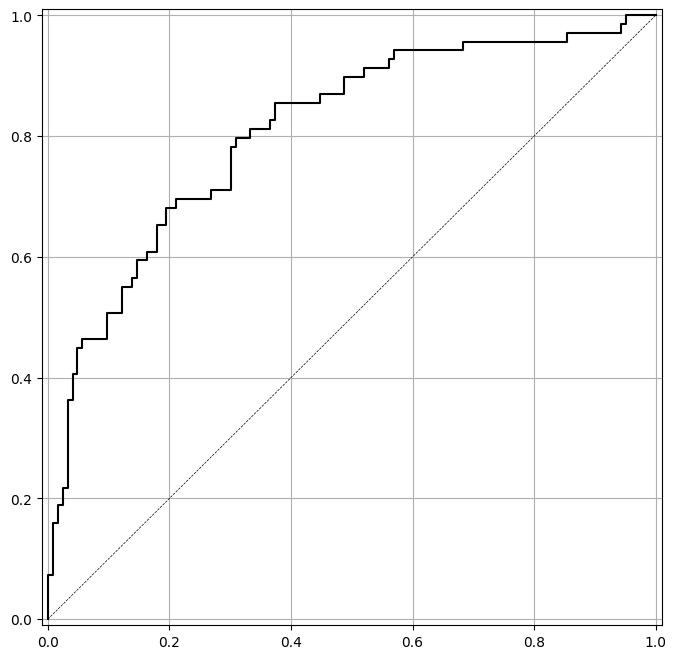

In [18]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [19]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

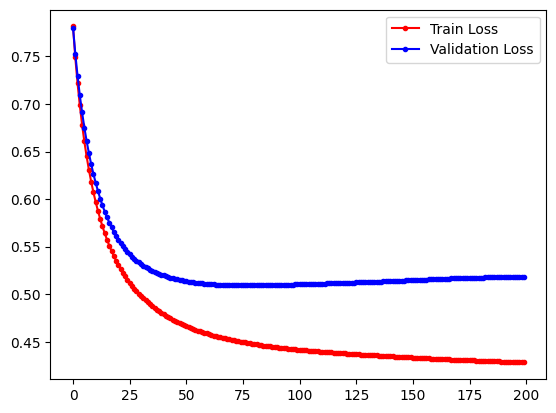

In [20]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

#type your answer here

What I can infer from the given graph is that after around 50 epoch, the validation loss remained constant while the train loss is still slowly decreasing. This I can say that with the perfect epoch for this training of model is around 50-100 epochs only or it will result to overfitting.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [21]:
# Load a different dataset
supDataset = pd.read_csv('/content/drive/MyDrive/datas/citrus.csv')

In [22]:
supDataset.dtypes

name         object
diameter    float64
weight      float64
red           int64
green         int64
blue          int64
dtype: object

In [23]:
supDataset.tail()

,name,diameter,weight,red,green,blue
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11
9999,grapefruit,16.45,261.51,152,74,2


In [24]:
# label encode the y values, orange = 1 and 0 is grapefruit
le = LabelEncoder()
supDataset['name'] = le.fit_transform(supDataset['name'])

In [25]:
# declare the x and y values
X = supDataset.drop('name', axis = 1)
y = supDataset['name']

In [26]:
# split the values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state = 100)

In [27]:
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [28]:
# Build a model with two hidden layers, each with 6 nodes
model_sup = Sequential([
    Dense(6, activation = 'relu', input_shape = (5,)),
    Dense(6, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [29]:
# Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
model_sup.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 36        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 1)                 7         
                                                                 
Total params: 85 (340.00 Byte)
Trainable params: 85 (340.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model_sup.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_sup.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
235/235 [==============================] - 2s 4ms/step - loss: 0.6512 - accuracy: 0.6200 - val_loss: 0.4951 - val_accuracy: 0.8308
Epoch 2/1500
235/235 [==============================] - 1s 3ms/step - loss: 0.4100 - accuracy: 0.8808 - val_loss: 0.3473 - val_accuracy: 0.8928
Epoch 3/1500
235/235 [==============================] - 1s 2ms/step - loss: 0.2906 - accuracy: 0.9128 - val_loss: 0.2686 - val_accuracy: 0.9052
Epoch 4/1500
235/235 [==============================] - 1s 2ms/step - loss: 0.2334 - accuracy: 0.9204 - val_loss: 0.2349 - val_accuracy: 0.9116
Epoch 5/1500
235/235 [==============================] - 1s 3ms/step - loss: 0.2082 - accuracy: 0.9239 - val_loss: 0.2204 - val_accuracy: 0.9144
Epoch 6/1500
235/235 [==============================] - 1s 3ms/step - loss: 0.1965 - accuracy: 0.9260 - val_loss: 0.2139 - val_accuracy: 0.9184
Epoch 7/1500
235/235 [==============================] - 1s 2ms/step - loss: 0.1904 - accuracy: 0.9280 - val_loss: 0.2111 - val_accuracy:

In [31]:
# Graph the trajectory of the loss functions, accuracy on both train and test set
y_pred_class_nn_1 = (model_sup.predict(X_test_norm) > 0.5).astype("int32")
y_pred_prob_nn_1 = model_sup.predict(X_test_norm)

79/79 [==============================] - 0s 1ms/step


accuracy is 0.993
roc-auc is 0.998


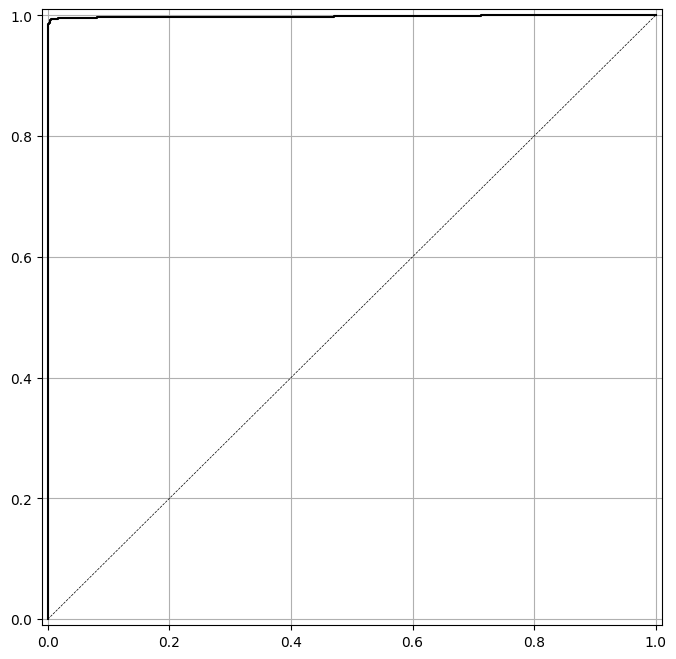

In [32]:
# Graph the trajectory of the loss functions, accuracy on both train and test set
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))
plot_roc(y_test, y_pred_prob_nn_1, 'NN')

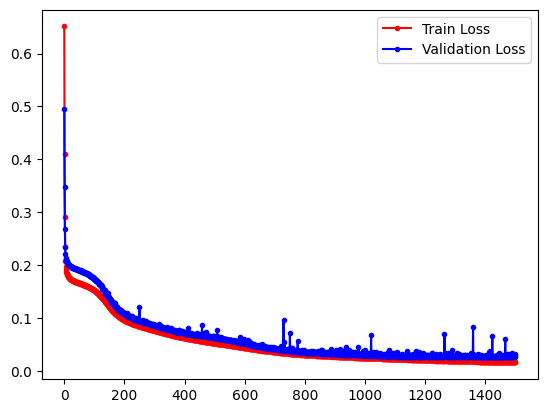

In [33]:
# Graph the trajectory of the loss functions, accuracy on both train and test set
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [ ]:
# Interpret your result
'''
Due to really high number of epoch, we can see some abnormalities to the trajectory of
loss function, we can see the validation loss suddenly going up at times but goes
down. This shows overfitting and inconsistency of our model
'''

#### Conclusion

This activity made me undestood how creating a neural network link is done.
With the help of given codes and dataset I was able to make my first neural network model and interpret its results. By not only looking at accuracy, I was given the proper idea on how well does a model perform especially with the loss functions. It also successfully shown how important getting the right amount of epoch for the training of the dataset.